In [1]:
from numpy import random, dot, exp, array
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

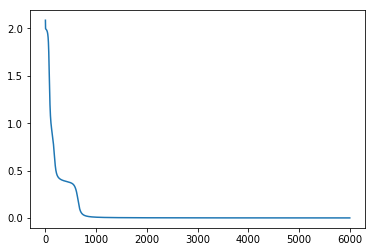

[[0.99525548 0.0087826 ]]


In [3]:
class NeuralNetwork:
    def __init__(self, gateInput, gateOutput):
        random.seed(1)
        
        self.gateInput=gateInput
        self.gateOutput=gateOutput
        self.input_shape=(1, 3)
        self.output_shape=(1, 2)
        self.layer1_nodes=5
        self.layer2_nodes=5
        self.layer3_nodes=5
        
        
        self.weights1 = 2*random.random((self.input_shape[1], self.layer1_nodes)) -1
        self.weights2 = 2*random.random((self.layer1_nodes, self.layer2_nodes)) -1
        self.weights3 = 2*random.random((self.layer2_nodes, self.layer3_nodes)) -1
        self.out_weights = 2*random.random((self.layer3_nodes, self.output_shape[1])) -1
        
    
    def sigmoid(self, x):
        return 1 / (1 + exp(-x))
    
    
    def sigmoid_derivative(self, x):
        return x * (1-x)
    
    
    def think(self, x):
        layer1=self.sigmoid(dot(x, self.weights1))
        layer2=self.sigmoid(dot(layer1, self.weights2))
        layer3=self.sigmoid(dot(layer2, self.weights3))
        output=self.sigmoid(dot(layer3, self.out_weights))
        return output
        
        
    def train(self, num):
        errors=[]
        for ix in range(num):
            layer1=self.sigmoid(dot(self.gateInput, self.weights1))
            layer2=self.sigmoid(dot(layer1, self.weights2))
            layer3=self.sigmoid(dot(layer2, self.weights3))
            output=self.sigmoid(dot(layer3, self.out_weights))
            
            
            output_error=self.gateOutput-output
            error=((output_error**2).sum())/2*self.output_shape[0]
            errors.append(error)
            
            delta=output_error*self.sigmoid_derivative(output)
            
            out_weights_adjustment=dot(layer3.T, delta)
            
            delta=dot(delta, self.out_weights.T)*self.sigmoid_derivative(layer3)            
            weights_adjustment3=dot(layer2.T,delta)
            
            delta=dot(delta, self.weights3.T)*self.sigmoid_derivative(layer2)            
            weights_adjustment2=dot(layer1.T,delta)
            
            delta=dot(delta, self.weights2.T)*self.sigmoid_derivative(layer1)            
            weights_adjustment1=dot(self.gateInput.T,delta)
            self.out_weights += out_weights_adjustment
            self.weights1 += weights_adjustment1
            self.weights3 += weights_adjustment3
            self.weights2 += weights_adjustment2            
        return errors
    
    
if __name__ == '__main__':
    file = pd.read_csv("/Users/adityakumar/Desktop/ML/dataset.txt", delimiter=',')

    dataset = file.values

    gateInput = dataset[:,:3]
    gateOutput = dataset[:,3:]

    neural_network = NeuralNetwork(gateInput, gateOutput)

    err = neural_network.train(6000)
    plt.plot(err)
    plt.show()
      # Should be 0 , 1
    print(neural_network.think([[0,1,1]]))
            
            
        